# Hong Kong Pollution & Weather: EDA

## 1. Load Required Python Packages

In [31]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<b>Locate and print current working directory.</b>

In [32]:
path = os.getcwd()
print(path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks


<b>Get parent directory and append path to processed data.</b>

In [33]:
# Create raw data path by getting parent directory of current working directory and appending data/processed
parent_path = os.path.dirname(path)
processeddata_path = os.path.join(parent_path, 'data', 'processed')
print(processeddata_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/processed


## 2. Load Pollution Data into DataFrame

In [34]:
max_pollution = pd.read_csv(processeddata_path+'/daily_max_pollution.csv',index_col=0)

In [35]:
max_pollution.head()

,Date,Hour,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
0,2014-01-01,Daily Max,8.0,7.0,9.0,8.0,7.0,7.0,7.0,8.0,7.0,6.0,7.0,10.0,8.0,9.0
1,2014-01-02,Daily Max,7.0,6.0,7.0,8.0,6.0,7.0,7.0,8.0,7.0,5.0,6.0,9.0,7.0,8.0
2,2014-01-03,Daily Max,9.0,9.0,11.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0
3,2014-01-04,Daily Max,9.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,10.0,8.0,9.0,11.0,10.0,9.0
4,2014-01-05,Daily Max,8.0,8.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0


In [36]:
mong_kok_poll = max_pollution[['Date','Mong Kok']]

In [37]:
mong_kok_poll.head()

,Date,Mong Kok
0,2014-01-01,9.0
1,2014-01-02,8.0
2,2014-01-03,11.0
3,2014-01-04,9.0
4,2014-01-05,9.0


In [38]:
mong_kok_poll.rename(columns={'Mong Kok':'Daily Max AQHI'},inplace=True)

/Users/tiffanyflor/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Map Pollution Rating to Health Risk Categories

In [42]:
aqhi_mapper = {1.0:'Low',
               2.0:'Low',
               3.0:'Low',
               4.0:'Moderate',
               5.0:'Moderate',
               6.0:'Moderate',
               7.0:'High',
               8.0:'Very High',
               9.0:'Very High',
               10.0:'Very High',
               11.0:'Serious'}

mong_kok_poll['AQHI Health Risk']=mong_kok_poll['Daily Max AQHI'].map(aqhi_mapper)

<ipython-input-42-f4adef811f53>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['AQHI Health Risk']=mong_kok_poll['Daily Max AQHI'].map(aqhi_mapper)


In [43]:
mong_kok_poll.head()

,Date,Daily Max AQHI,AQHI Health Risk
0,2014-01-01,9.0,Very High
1,2014-01-02,8.0,Very High
2,2014-01-03,11.0,Serious
3,2014-01-04,9.0,Very High
4,2014-01-05,9.0,Very High


In [51]:
mong_kok_poll['Date'] = pd.to_datetime(mong_kok_poll['Date'], format='%Y%m%d')
mong_kok_poll['AQHI Health Risk'] = mong_kok_poll['AQHI Health Risk'].astype('category')

<ipython-input-51-f71c66302964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['Date'] = pd.to_datetime(mong_kok_poll['Date'], format='%Y%m%d')
<ipython-input-51-f71c66302964>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mong_kok_poll['AQHI Health Risk'] = mong_kok_poll['AQHI Health Risk'].astype('category')


In [52]:
mong_kok_poll.dtypes

Date                datetime64[ns]
Daily Max AQHI             float64
AQHI Health Risk          category
dtype: object

In [53]:
mong_kok_poll.tail()

,Date,Daily Max AQHI,AQHI Health Risk
2368,2020-06-26,3.0,Low
2369,2020-06-27,3.0,Low
2370,2020-06-28,3.0,Low
2371,2020-06-29,3.0,Low
2372,2020-06-30,3.0,Low


### Examine Pollution Summary Statistics

In [54]:
mong_kok_poll.shape

(2373, 3)

In [66]:
mong_kok_poll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2372
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2373 non-null   datetime64[ns]
 1   Daily Max AQHI    2373 non-null   float64       
 2   AQHI Health Risk  2373 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 58.1 KB


In [61]:
mong_kok_poll.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Max AQHI,2373.0,4.900126,1.605131,2.0,4.0,5.0,6.0,11.0


In [62]:
mong_kok_poll.describe(include=['category']).T

,count,unique,top,freq
AQHI Health Risk,2373,5,Moderate,1631


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122f39c70>]],
      dtype=object)

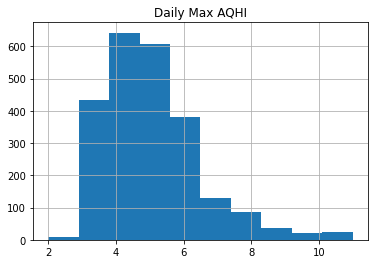

In [67]:
mong_kok_poll.hist()

## 3. Load Pollution Data into DataFrame